#Inicio

In [1]:
using PrimerOrden, Intervalos, RungeKutta
using PyPlot, Images

INFO: Loading help data...


In [2]:
include("pruebas.jl");

Probando funciones para intervalos anidados
10 facts verified.
Probando RungeKutta
5 facts verified.
Probando función envolvente
5 facts verified.
Probando función NEulerMPasos
15 facts verified.


#Ecuaciones Diferenciales Ordinarias con Intervalos





##Autores:
###          - José Ernesto Alba Arroyo
###          - Santiago Hernández Gómez

#Objetivo

Obtener métodos para resolver ecuaciones diferenciales a primer orden y graficar sus resultados, asegurando el resultado de manera ***rigurosa*** hasta un tiempo determinado. Es decir, resolver el PVI:


\begin{equation}
    \left\{
        \begin{array}{ll}
            \dot{x}(t)=f(x(t)), \hspace{1cm} t \in [0,T'] \\
            x(t_0)=x_0.
        \end{array}
    \right.
\end{equation}

Por medio de intervalos y hasta un tiempo $T'$. Se asegura la solución a pesar de que las condiciones iniciales sean números no representables o un intervalo delgado.

#Método de Runge Kutta 2 y 4 para números

Son métodos iterativos de **orden de convergencia fijo** para encontrar la solución de una ecuación diferencial de manera **aproximada**. Utilizan el desarrollo de Taylor (de orden 2 o 4) de la derivada de la función $f(x,t)$.

Sus inputs básicos son: $t_0$ (tiempo inicial), $x_0$ (condición inicial), $dt$ (longitud del paso de integración), $n$  (número de pasos de integración)

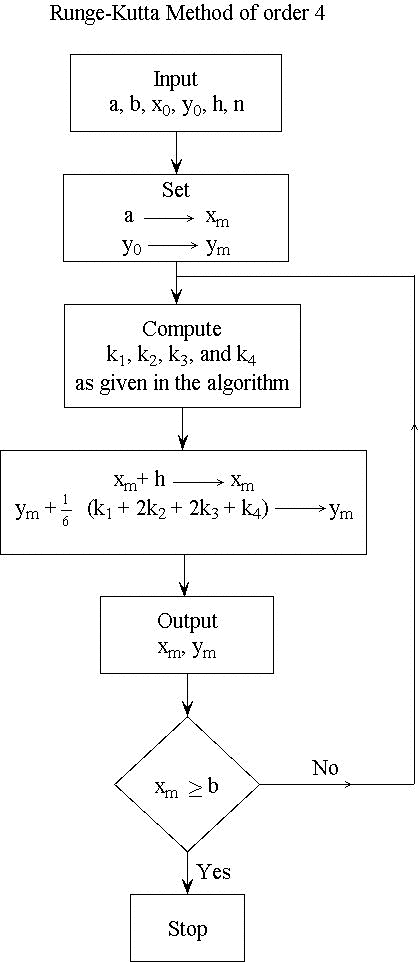

In [3]:
imread("fig1.jpg")

#Método de Primer Orden (Euler de Intervalos)

Partimos de que tenemos un intervalo $z_0$, "sacado de la manga",  que contiene a la solución hasta un tiempo $n*dt$. 

**Nuestra** propuesta es que este $z_0$ se calcula con la solución con el método de Runge Kutta a orden 4 y se engrosa sumándole a los extremos $\pm \, 2.0^{-10} (\sim0.001)$ del radio del intervalo conformado por el mínimo y el máximo de la trayectoria. 

In [4]:

# d/dt x(t) = -2x(t) ; x(0)=3   →    x(t)= 3 exp(-2t)

f(t,x)=-2x
f(x)=-2x

t0=0.0;
x0=3.0;
dt=2.0^-12;
n=2^12;
tf=t0+dt*n;
x_RK=RungeKutta4(t0,x0,dt,n,f);
z0=zetacero(x0,dt,n,f)

[4.034726684503650911083581787064389345687231980264186859130859375e-01,
3.0025331973966337901550162359232132303077378310263156890869140625e+00]

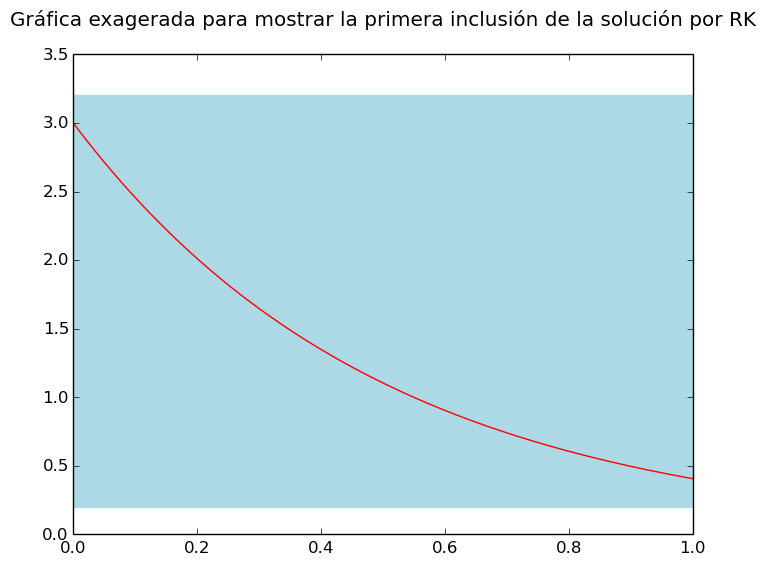

true

In [5]:
PyPlot.plot(linspace(t0,tf,n+1),x_RK,"r")
PyPlot.fill_between([0,1],float64(z0.a-0.2),float64(z0.b+0.2),color="lightblue")
PyPlot.title("Gráfica exagerada para mostrar la primera inclusión de la solución por RK\n")

Intervalo(x_RK[1],x_RK[end]) in z0

##Primer paso de integración
###En primer lugar queremos mejorar esto acotando "verticalmente" (en el eje x):
Primero quisiéramos una secuencia de intervalos anidados  e independientes del tiempo ,  $\mathbf{z}^{k}$ $(k>0)$, que estén contenidos en $\mathbf{z}^{0}$ (y que contengan a toda la trayectoria). 

Una propuesta para estos intervalos anidados es:

\begin{equation}
    \mathbf{z}^{(k+1)}= x_0 + \int_0^{T} F(\mathbf{z}^{(k)})ds = x_0 + \left[0,T \right] \times F(\mathbf{z}^{(k)})
\end{equation}

Donde $F(\mathbf{z})$ es la extensión natural de $f(x(t))=\dot{x}(t)$

[Tucker], [Moore] Nos aseguran, por medio de teoremas que involucran que $f$ y su extensión $F$ sean una funciones Lipschitz, que si encontramos la $T=T'$ que hace que $\mathbf{z}^{(1)} \subseteq \mathbf{z}^{(0)}$, podemos asegurarnos que $\mathbf{z}^{(k)} \subseteq \mathbf{z}^{(k-1)}$ Para toda $k$.

Siempre existe $T=T' \le n \;dt=t_f $ (hicimos una función BuscarTBuena)

Esto ayuda hasta cierto punto, pues dependiendo de la forma de $F$ siempre se llega hasta una $k'$ tal que  $z^{(k'+1)}=z^{(k')}$.




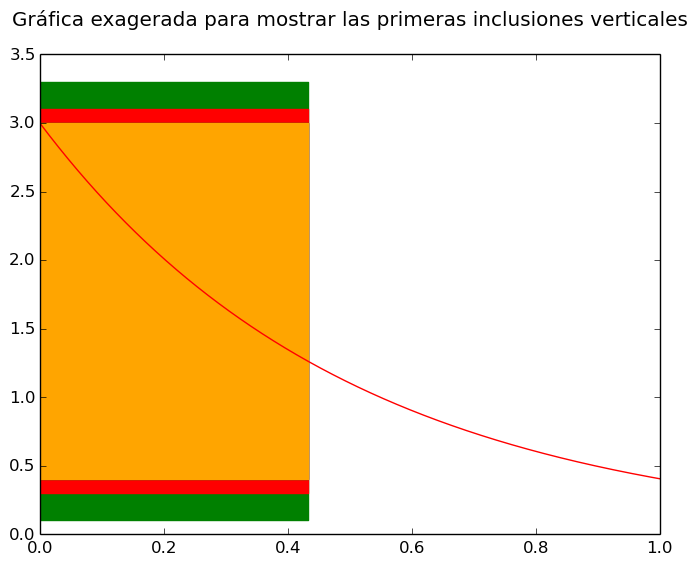

4-element Array{Bool,1}:
 true
 true
 true
 true

In [6]:
T= BuscarTBuena(x0,t0,dt,n,f,z0)    
z1=kaesimaZeta(t0,T,x0,z0,f,1)[end]
z2=kaesimaZeta(t0,T,x0,z0,f,2)[end]
z3=kaesimaZeta(t0,T,x0,z0,f,3)[end]

PyPlot.plot(linspace(t0,tf,n+1),x_RK,"r")
PyPlot.fill_between([0,T],float64(z0.a-0.3),float64(z0.b+0.3),color="green")
PyPlot.fill_between([0,T],float64(z1.a-0.1),float64(z1.b+0.1),color="red")
PyPlot.fill_between([0,T],float64(z2.a),float64(z2.b),color="black")
PyPlot.fill_between([0,T],float64(z3.a),float64(z3.b),color="orange")

PyPlot.title("Gráfica exagerada para mostrar las primeras inclusiones verticales\n")
[Intervalo(x_RK[1],x_RK[end]) in z0, z1 in z0, z2 in z1 , z3 in z2]

Lo anterior da encasillamientos con forma de *rectángulo*, estaría mejor si tomamos encasillamientos en forma de *cono*, es decir tomar:

\begin{equation}
    \mathbf{C}^{(k)}(x_0, t)= x_0 + t F(\mathbf{z}^{(k)})
\end{equation}

Esto es, variando el tiempo $t\in [0,T']$ : se forman conos que se extienden desde $x_0$. La cáscara de este cono ,$\mathbf{C}^{(k)}(x_0, T')$, está contenida dentro de $ \mathbf{z}^{(k)}$ y contiene la trayectoria hasta $T'$

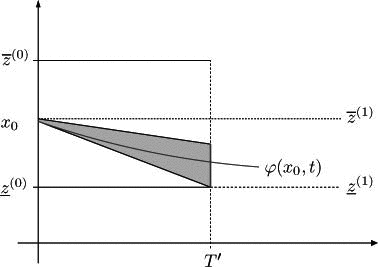

In [7]:
imread("fig2.jpg") 

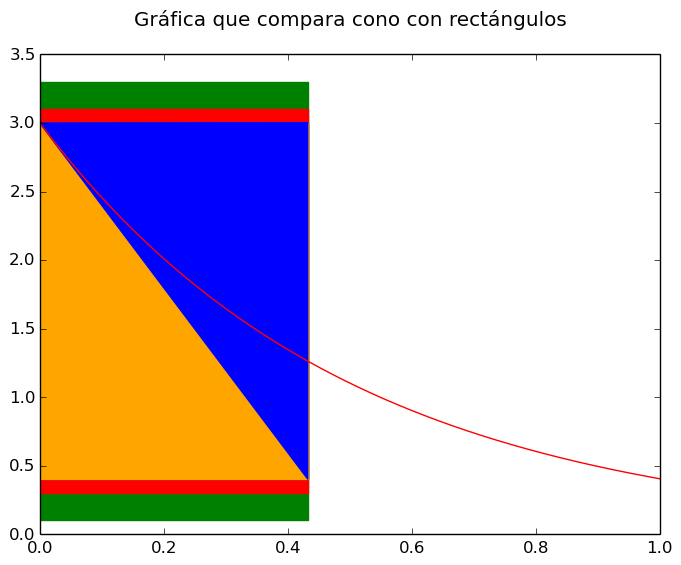

In [8]:
PyPlot.plot(linspace(t0,tf,n+1),x_RK,"r")
PyPlot.fill_between([0,T],float64(z0.a-0.3),float64(z0.b+0.3),color="green")
PyPlot.fill_between([0,T],float64(z1.a-0.1),float64(z1.b+0.1),color="red")
PyPlot.fill_between([0,T],float64(z2.a),float64(z2.b),color="black")
PyPlot.fill_between([0,T],float64(z3.a),float64(z3.b),color="orange")

graficaCono(0,T,x0,z0)

PyPlot.title("Gráfica que compara cono con rectángulos\n");

###Ahora queremos mejorar esto acotando "horizontalmente" (en el eje t):


Los anchos de los conos siempre crecen por lo que mientras más avancemos en tiempo, mayor será el intervalo resultante. Una manera de evitar esto es partir este primer paso de integración en subpasos, de modo que en cada subpaso utilicemos como 'condición inicial' el resultado del paso anterior, que es un intervalo.

El procedimiento es :
Se hacen particiones en el tiempo $[t_1=0,t_2,..,t_n=T']$
Se toma el cono que parte de $x_0$ (suponiendo que es un número) hasta el tiempo $t_1$. Se queda con el cascarón $x_1 $ y se toman los conos que parten de los puntos finales de $x_1$ hasta un tiempo $t_2$,  se *unen* estos dos intervalos para definir $x_2$ y se vuelven a tomar los puntos finales de $x_2$ para crear un cono hasta $t_3$ (...n veces)

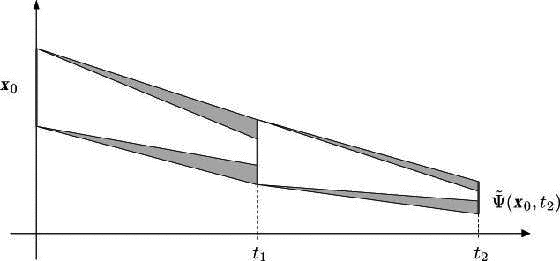

In [9]:
imread("fig3.jpg")

Al final se tiene una secuencia de $n$ intervalos con la que se puede *envolver* la trayectoria de manera rigurosa hasta un tiempo T'. La función que hace esto se llama `envolvente`

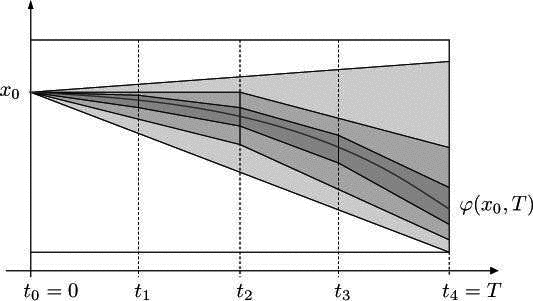

In [10]:
imread("fig4.jpg")

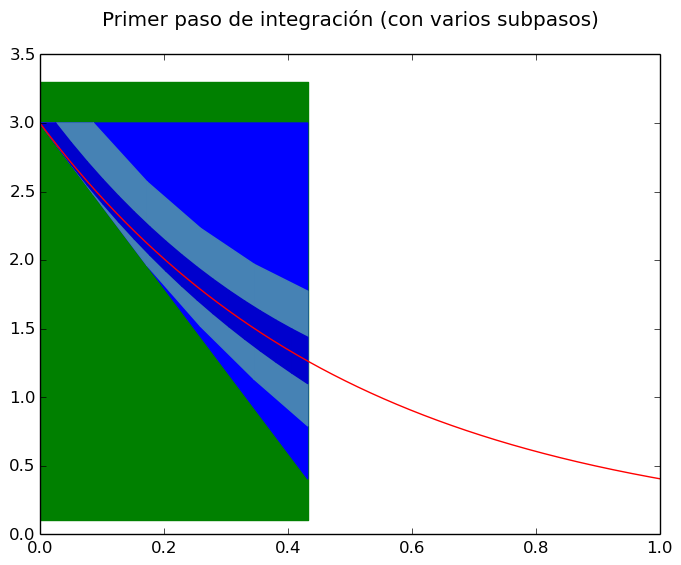

In [11]:
PyPlot.plot(linspace(t0,tf,n+1),x_RK,"r")
PyPlot.fill_between([0,T],float64(z0.a-0.3),float64(z0.b+0.3),color="green")
m=0
nuevaListaXs=envolvente(t0,T,x0,z0,f,m)
graficaEnvolvente(t0,T,x0,nuevaListaXs)
m=4
nuevaListaXs=envolvente(t0,T,x0,z0,f,m)
graficaEnvolvente(t0,T,x0,nuevaListaXs,"steelblue")
m=16
nuevaListaXs=envolvente(t0,T,x0,z0,f,m)
graficaEnvolvente(t0,T,x0,nuevaListaXs,"mediumblue")

PyPlot.title("Primer paso de integración (con varios subpasos)\n");

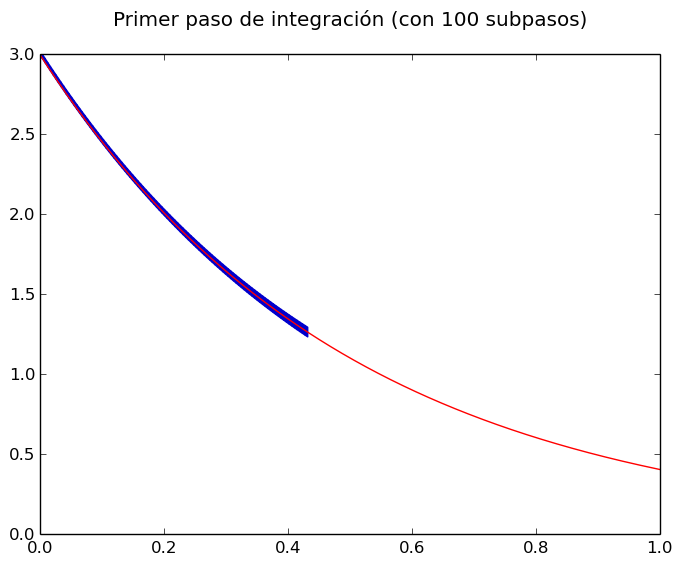

In [12]:
PyPlot.plot(linspace(t0,tf,n+1),x_RK,"r")
m=100
nuevaListaXs=envolvente(t0,T,x0,z0,f,m)
graficaEnvolvente(t0,T,x0,nuevaListaXs,"mediumblue")

PyPlot.title("Primer paso de integración (con 100 subpasos)\n");

# Segundo paso de integración y siguientes

Lo anterior sólo nos asegura la solución hasta un tiempo T' [Tucker]. El problema es que *casi* siempre $T$ << $t_{f}$  y el método no es aceptable tal y como está.


## Un ejemplo donde T' es casi tf

In [13]:
# UN EJEMPLO DONDE T' es casi tf

f(t,x)=-0.01x
f(x)=-0.01x

t0=0.0;
x0=1.0;
dt=2.0^-12;
n=2^12;
tf=t0+dt*n;
numero_de_particiones_en_el_tiempo=5; #################cambiar esto en la presentación para mostrar cómo se ajusta mejor
ordenK=numero_de_particiones_en_el_tiempo;
x_RK=RungeKutta4(t0,x0,dt,n,f);


ANS=NEuler1Paso(f,x0,t0,n,dt,ordenK)
tfinal1paso=ANS[2];
nuevaListaXstotal=ANS[1];


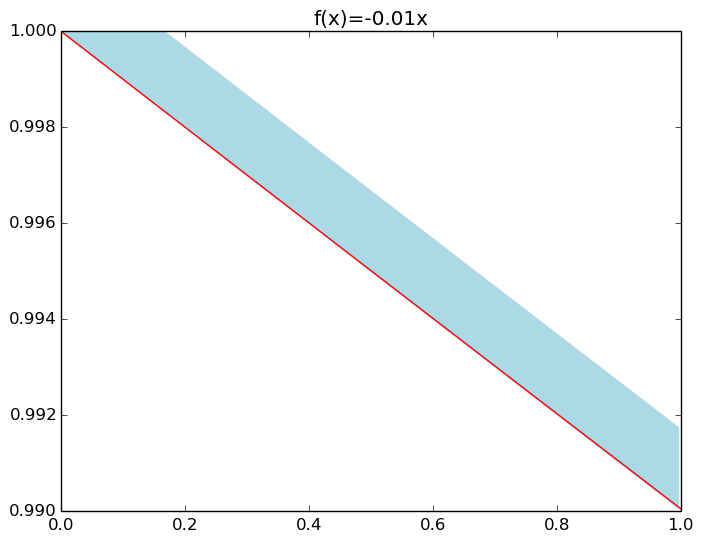

0.99560546875

In [14]:
graficaEnvolvente(t0,tfinal1paso,x0,nuevaListaXstotal,"lightblue")
PyPlot.plot(linspace(t0,tf,n+1),x_RK,"r")
PyPlot.title("f(x)=-0.01x")
tfinal1paso

## Un ejemplo donde T' << tf:

In [15]:

# UN EJEMPLO DONDE T' << tf

f(t,x)=-10x^2
f(x)=-10x^2

t0=0.0;
x0=1.0;
dt=2.0^-12;
n=2^12;
tf=t0+dt*n;
numero_de_particiones_en_el_tiempo=5; #################cambiar esto en la presentación para mostrar cómo se ajusta mejor
ordenK=numero_de_particiones_en_el_tiempo;
x_RK=RungeKutta4(t0,x0,dt,n,f);


ANS=NEuler1Paso(f,x0,t0,n,dt,ordenK)
tfinal1paso=ANS[2];
nuevaListaXstotal=ANS[1];

tfinal1paso

0.090576171875

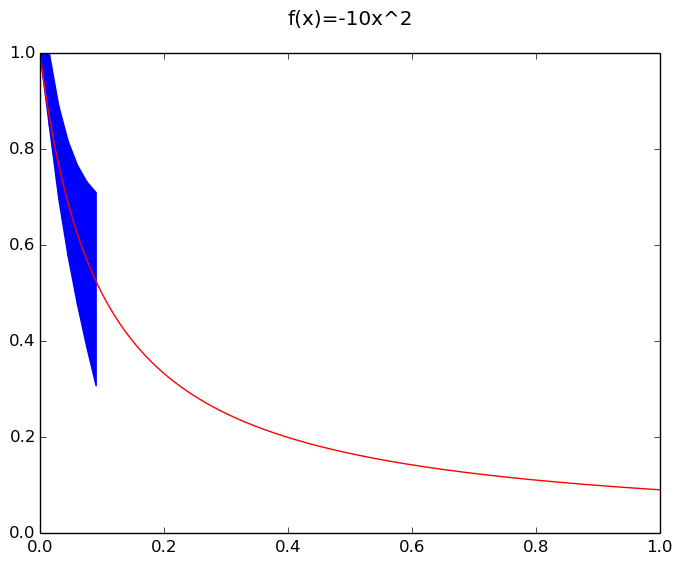

In [16]:
graficaEnvolvente(t0,tfinal1paso,x0,nuevaListaXstotal,"blue")
PyPlot.plot(linspace(t0,tf,n+1),x_RK,"r")
PyPlot.title("f(x)=-10x^2\n");

**Nuestra** propuesta es que podemos hacer todo este proceso iterativamente $M$ veces:

Podemos hacer el primer paso de integración gasta T y a partir de ahí, usar el último intervalo que resulte de la integración como condición inicial (la condición inicial ahora es un intervalo siempre) y reiniciar el tiempo para buscar una nueva $T^{'}_2$ que nos garantice el resultado hasta $T^{'}+T^{'}_2$, obtener un intervalo final y usarlo nuevamente de condición inicial para buscar un $T^{'}_3$ (...) $M$ veces

In [17]:

f(t,x)=-10x^2
f(x)=-10x^2

t0=0.0;
x0=1.0;
dt=2.0^-12;
n=2^12;
tf=t0+dt*n;
numero_de_particiones_en_el_tiempo=50 #################cambiar esto en la presentación para mostrar cómo se ajusta mejor
ordenK=numero_de_particiones_en_el_tiempo;




pasosdeintegracion=100
M=pasosdeintegracion;



x_RK=RungeKutta4(t0,x0,dt,n,f);

tic()
ANS=NEulerMPasos(f,x0,t0,n,dt,ordenK,pasosdeintegracion)
tinicial=ANS[1];
xinicial=ANS[2];
nuevaListaXstotal=ANS[3];

T=NEuler1Paso(f,x0,t0,n,dt,ordenK)[2];
toc()

elapsed time: 47.985538607 seconds


47.985538607

el número máximo alcanzado con intervalos es: 0.302001953125 de 1.0


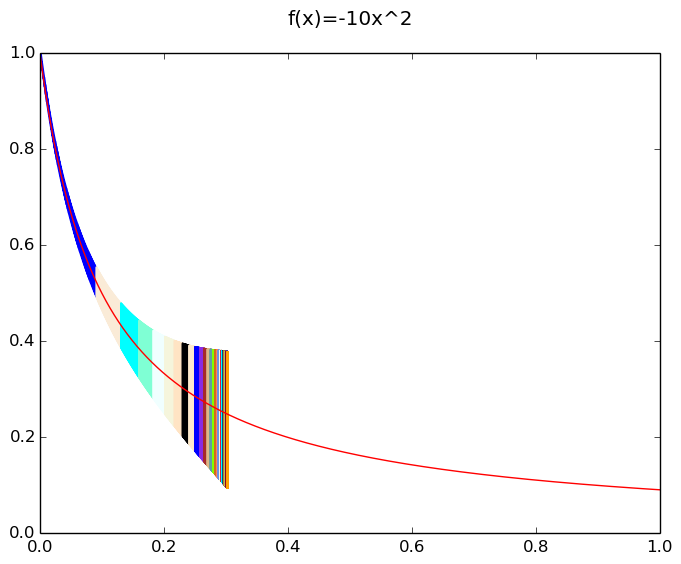

In [18]:
graficarEulerM(tinicial,xinicial,nuevaListaXstotal,x_RK,t0,tf,n,dt,pasosdeintegracion,true)
PyPlot.title("f(x)=-10x^2\n");

Sería perfecto que existiera una $l$ tal que:   
\begin{equation}
   \sum_{i=0}^{l} T^{'}_i = t_f
\end{equation}
 Pero si la función no decrece lo suficientemente rápido y de manera *agradable*, no podemos asegurarlo.

#  EJEMPLOS DE FUNCIONES QUE SÍ SE DEJAN INTEGRAR POR EL MÉTODO COMPLETO:

In [19]:
tic()

f(t,x)=exp(-x^2)
f(x)=exp(-x^2)

t0=0.0;
x0=1.0;
dt=2.0^-12;
n=2^12;
tf=t0+dt*n;
particiones_en_el_tiempo_para_E1=100;
ordenK=particiones_en_el_tiempo_para_E1;

pasosdeintegracion=40;
M=pasosdeintegracion;

x_RK=RungeKutta4(t0,x0,dt,n,f);


ANS=NEulerMPasos(f,x0,t0,n,dt,ordenK,pasosdeintegracion)
tinicial=ANS[1];
xinicial=ANS[2];
nuevaListaXstotal=ANS[3];

T=NEuler1Paso(f,x0,t0,n,dt,ordenK)[2];

toc();

elapsed time: 22.727650007 seconds


el número máximo alcanzado con intervalos es: 0.989990234375 de 1.0


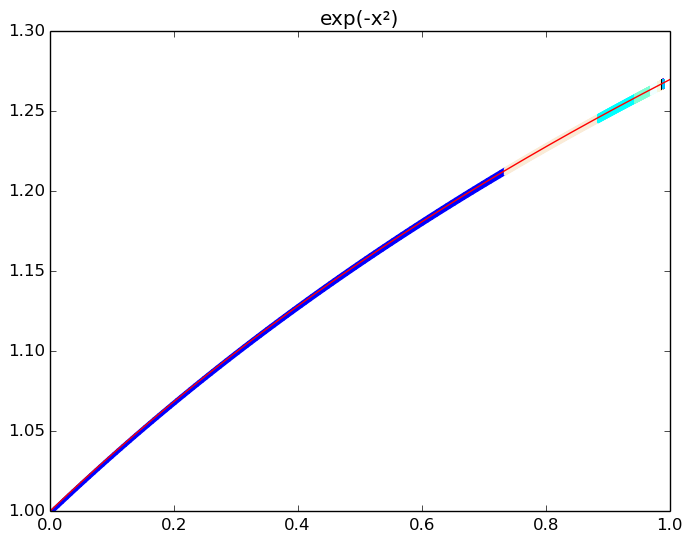

In [20]:
graficarEulerM(tinicial,xinicial,nuevaListaXstotal,x_RK,t0,tf,n,dt,pasosdeintegracion,true)
PyPlot.title("exp(-x²)");

In [21]:
tic()

f(t,x)=-x^6
f(x)=-x^6

t0=0.0;
x0=1.0;
dt=2.0^-12;
n=2^12;
tf=t0+dt*n;

particiones_en_el_tiempo_para_E1=100;
ordenK=particiones_en_el_tiempo_para_E1;

pasosdeintegracion=40;
M=pasosdeintegracion;

x_RK=RungeKutta4(t0,x0,dt,n,f);


ANS=NEulerMPasos(f,x0,t0,n,dt,ordenK,pasosdeintegracion)
tinicial=ANS[1];
xinicial=ANS[2];
nuevaListaXstotal=ANS[3];

T=NEuler1Paso(f,x0,t0,n,dt,ordenK)[2];

toc();

elapsed time: 19.938348913 seconds


el número máximo alcanzado con intervalos es: 0.89794921875 de 1.0


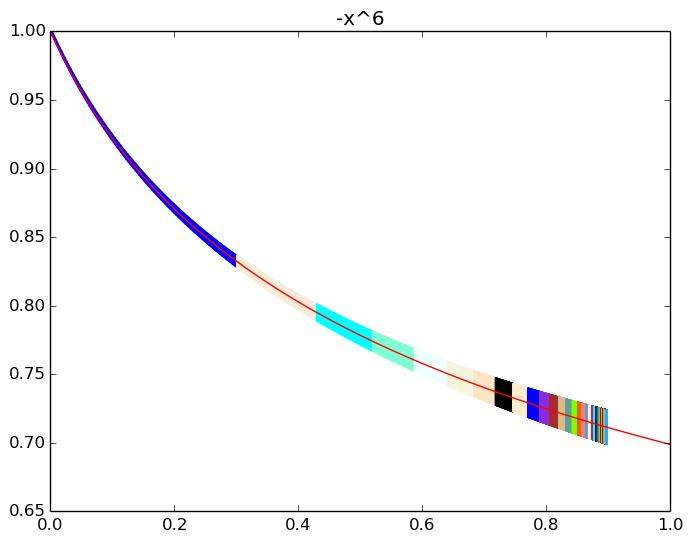

In [22]:
graficarEulerM(tinicial,xinicial,nuevaListaXstotal,x_RK,t0,tf,n,dt,pasosdeintegracion,true)
PyPlot.title("-x^6");

In [23]:
tic()
f(t,x)=x
f(x)=x
t0=0.0;
x0=1.0;
dt=2.0^-12;
n=2^12;
tf=t0+dt*n;
particiones_en_el_tiempo_para_E1=100;
ordenK=particiones_en_el_tiempo_para_E1;

pasosdeintegracion=100;
M=pasosdeintegracion;

x_RK=RungeKutta4(t0,x0,dt,n,f);


ANS=NEulerMPasos(f,x0,t0,n,dt,ordenK,pasosdeintegracion)
tinicial=ANS[1];
xinicial=ANS[2];
nuevaListaXstotal=ANS[3];

T=NEuler1Paso(f,x0,t0,n,dt,ordenK)[2];

toc();

elapsed time: 25.102509859 seconds


el número máximo alcanzado con intervalos es: 0.99072265625 de 1.0


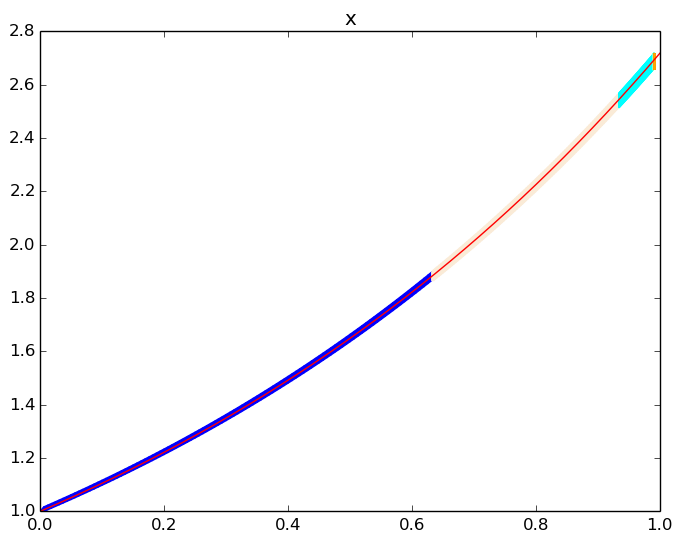

In [24]:
graficarEulerM(tinicial,xinicial,nuevaListaXstotal,x_RK,t0,tf,n,dt,pasosdeintegracion,true)
PyPlot.title("x");

In [25]:
tic()
f(t,x)=(-x^2)*exp(-x)
f(x)=(-x^2)*exp(-x)
t0=0.0;
x0=1.0;
dt=2.0^-12;
n=2^12;
tf=t0+dt*n;
particiones_en_el_tiempo_para_E1=100;
ordenK=particiones_en_el_tiempo_para_E1;

pasosdeintegracion=100;
M=pasosdeintegracion;

x_RK=RungeKutta4(t0,x0,dt,n,f);


ANS=NEulerMPasos(f,x0,t0,n,dt,ordenK,pasosdeintegracion)
tinicial=ANS[1];
xinicial=ANS[2];
nuevaListaXstotal=ANS[3];

T=NEuler1Paso(f,x0,t0,n,dt,ordenK)[2];

toc();

elapsed time: 80.371008573 seconds


el número máximo alcanzado con intervalos es: 0.983642578125 de 1.0


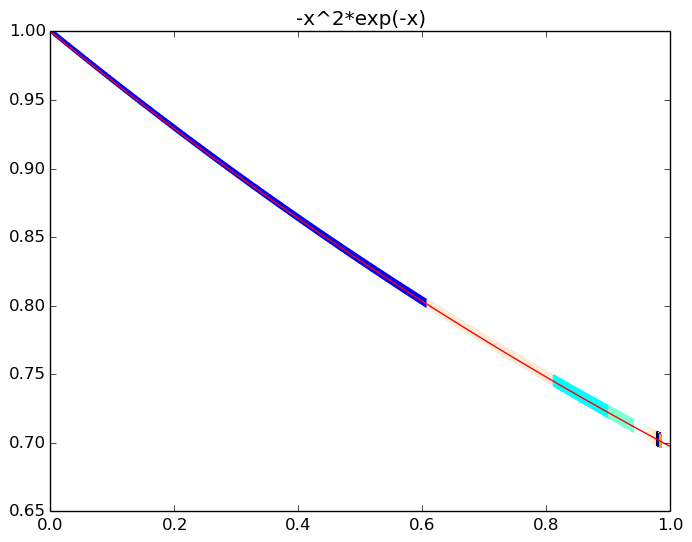

In [26]:
graficarEulerM(tinicial,xinicial,nuevaListaXstotal,x_RK,t0,tf,n,dt,pasosdeintegracion,true)
PyPlot.title("-x^2*exp(-x)");

In [27]:
tic()
f(t,x)=x^(-1/2)
f(x)=x^(-1/2)
t0=0.0;
x0=1.0;
dt=2.0^-12;
n=2^12;
tf=t0+dt*n;
particiones_en_el_tiempo_para_E1=40;
ordenK=particiones_en_el_tiempo_para_E1;

pasosdeintegracion=10;
M=pasosdeintegracion;

x_RK=RungeKutta4(t0,x0,dt,n,f);


ANS=NEulerMPasos(f,x0,t0,n,dt,ordenK,pasosdeintegracion)
tinicial=ANS[1];
xinicial=ANS[2];
nuevaListaXstotal=ANS[3];

T=NEuler1Paso(f,x0,t0,n,dt,ordenK)[2];

toc();

elapsed time: 4.983661508 seconds


el número máximo alcanzado con intervalos es: 0.9892578125 de 1.0


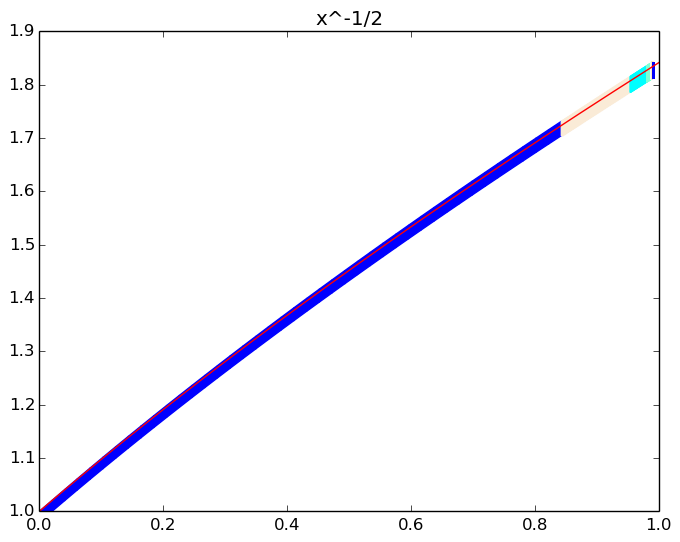

In [28]:
graficarEulerM(tinicial,xinicial,nuevaListaXstotal,x_RK,t0,tf,n,dt,pasosdeintegracion,true)
PyPlot.title("x^-1/2");

In [29]:
tic()
f(t,x)=x^(1/2)
f(x)=x^(1/2)
t0=0.0;
x0=1.0;
dt=2.0^-12;
n=2^12;
tf=t0+dt*n;
particiones_en_el_tiempo_para_E1=40;
ordenK=particiones_en_el_tiempo_para_E1;

pasosdeintegracion=10;
M=pasosdeintegracion;

x_RK=RungeKutta4(t0,x0,dt,n,f);


ANS=NEulerMPasos(f,x0,t0,n,dt,ordenK,pasosdeintegracion)
tinicial=ANS[1];
xinicial=ANS[2];
nuevaListaXstotal=ANS[3];

T=NEuler1Paso(f,x0,t0,n,dt,ordenK)[2];

toc();

elapsed time: 5.120987258 seconds


el número máximo alcanzado con intervalos es: 0.993896484375 de 1.0


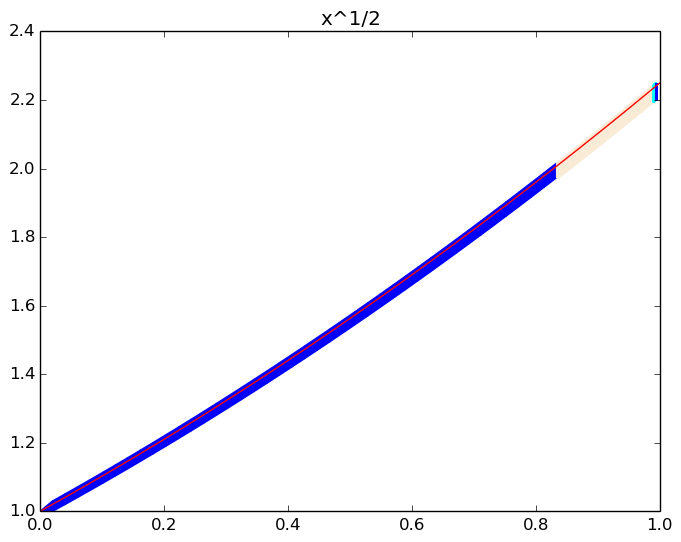

In [30]:
graficarEulerM(tinicial,xinicial,nuevaListaXstotal,x_RK,t0,tf,n,dt,pasosdeintegracion,true)
PyPlot.title("x^1/2");

#  EJEMPLOS DE FUNCIONES QUE **NO** SE DEJAN INTEGRAR:

No hay un tiempo finito (menor de 10 minutos) en que se pueda calcular casos como: 

$\frac{dx}{dt}=x^{2}$     $\;$ $\;$ $\;$  $\;$ o potencias mayores

$\frac{dx}{dt}=log(x)$

$\frac{dx}{dt}=función \; trigonométrica \; (x)$

# Cómo mejorar el código

El código **definitivamente** depende de si el método Runge Kutta-4 es válido o no. Se puede mejorar si se usa otro método de integración tradicional para resolver el ansatz inicial: ¿a quién doy para $z_0$?

La principal causa por la cual el código es tan lento es por que la función **BuscarTBuena** converge de manera **geométrica** y sería mejor si lo hiciera de manera exponencial. Esto lo hicimos así para evitar errores de incertidumbre en el tiempo: **siempre es mejor si se da $dt$ como una potencia de 2**.

Implementar un método de integración a varios órdenes (Series de Taylor).

#Bibliografía

[Tucker] Tucker, Warwick. *Validated Numerics. A short Introduction to Rigorous Computations*. Princeton University Press.2011

[Moore] Moore, Ramon E, et al.  *Introduction to Interval Analysis*. Society for Industrial and Applied Mathematics
Philadelphia.2009

[Dudas de Julia] Bogumi, Kaminski. *The Julia Express*.  http://bogumilkaminski.pl/files/julia_express.pdf